In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv("C:\\Users\\Aditya Yadav\\Downloads\\BostonHousing.csv")
data.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [78]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

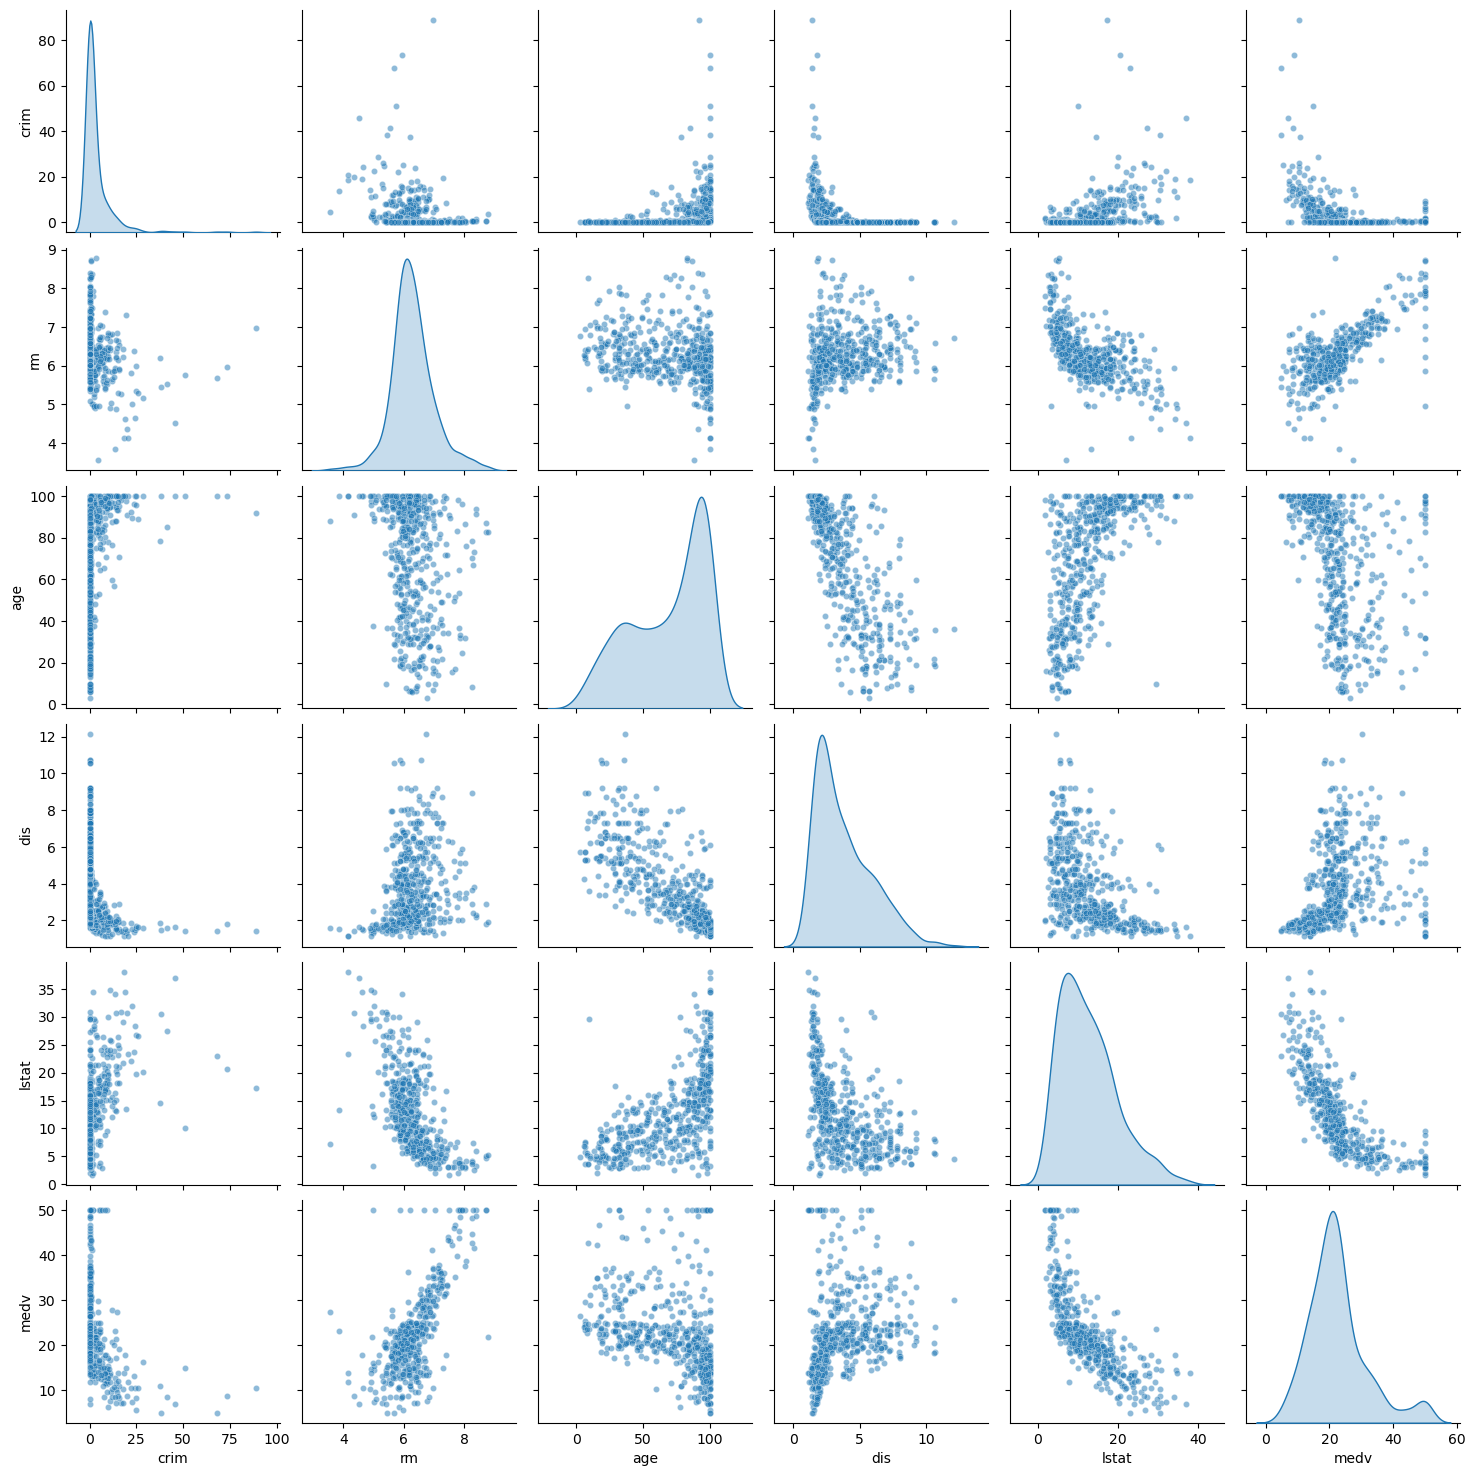

In [79]:
import seaborn as sns
selected_features = ['crim', 'rm', 'age', 'dis', 'lstat', 'medv']  # Choosing meaningful features

# Pairplot using Seaborn
sns.pairplot(data[selected_features], diag_kind="kde", plot_kws={'alpha':0.5, 's':20})
plt.show()

In [80]:
y=data['medv']
y = (y >= 30).astype(int)
x=data[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']]

In [81]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [83]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ypred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)
class_report = classification_report(ytest, ypred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.95

Confusion Matrix:
 [[88  3]
 [ 2  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.75      0.82      0.78        11

    accuracy                           0.95       102
   macro avg       0.86      0.89      0.88       102
weighted avg       0.95      0.95      0.95       102

